**Analysis** 
add analysis here

Review all the figures and tables that you generated in this assignment. Write at least three observations or inferences that can be made from the data. Include these observations at the top of your notebook.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from pathlib import Path
import numpy as np

# Study data files
mouse_metadata_path = ("C:/Users/miesb/OneDrive/Desktop/module_5_challenge/Starter_Code/Pymaceuticals/data/Mouse_metadata.csv")
study_results_path = ("C:/Users/miesb/OneDrive/Desktop/module_5_challenge/Starter_Code/Pymaceuticals/data/Study_results.csv")

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
distinct_mice = combined_data['Mouse ID'].nunique()
print(distinct_mice)

249


In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
mouseid_time = combined_data.drop_duplicates(['Mouse ID', 'Timepoint'], keep='first')
print(mouseid_time)

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data[combined_data.duplicated(['Mouse ID','Timepoint'], keep=False)]
print(duplicate_mice)

     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [5]:
# Optional: Get all the data for the duplicate mouse ID
duplicate_mice



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [128]:
#Create a clean DataFrame by dropping the duplicate mouse by its ID.
drop_duplicate_mice = combined_data.drop_duplicates(subset=['Mouse ID'], keep='last')
drop_duplicate_mice.head(40)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
59,s508,Ramicane,Male,1,17,45,30.276232,0
64,f966,Capomulin,Male,16,17,20,30.485985,0
74,m546,Ramicane,Male,18,16,45,30.564625,1
84,z578,Ramicane,Male,11,16,45,30.638696,0
94,j913,Ramicane,Female,4,17,45,31.560470,1


In [7]:
# Checking the number of mice in the clean DataFrame.
drop_duplicate_mice['Mouse ID'].value_counts().sum()

249

##**Summary Statistics**

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

statistics_table = drop_duplicate_mice.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median'])

statistics_table = statistics_table.rename(columns={
'mean': 'Mean Tumor Volume', 'median': 'Median Tumor Volume'})
statistics_table.head()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.

sem_tumor = drop_duplicate_mice.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
variance_tumor = drop_duplicate_mice.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_deviation_tumor = drop_duplicate_mice.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()

statistics_table['Tumor Volume Std. Error'] = sem_tumor
statistics_table['Tumor Volume Variance'] = variance_tumor
statistics_table['Tumor Volumen Std. Dev'] = std_deviation_tumor




# Assemble the resulting series into a single summary DataFrame.
summary_statistics = pd.DataFrame(statistics_table)
summary_statistics




,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Std. Error,Tumor Volume Variance,Tumor Volumen Std. Dev
Drug Regimen,,,,,
Capomulin,36.667568,38.125164,1.143038,32.663378,5.715188
Ceftamin,57.753977,59.851956,1.673114,69.982735,8.365568
Infubinol,58.178246,60.165180,1.720591,74.010875,8.602957
Ketapril,62.806191,64.487812,1.989184,98.921330,9.945920
Naftisol,61.205757,63.283288,2.059417,106.029927,10.297083
Placebo,60.508414,62.030594,1.774934,78.759797,8.874672
Propriva,56.736964,55.841410,1.665521,69.349002,8.327605
Ramicane,36.191390,36.561652,1.134308,32.166354,5.671539
Stelasyn,61.001707,62.192350,1.940056,90.331586,9.504293


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics = statistics_table = drop_duplicate_mice.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
table_title = 'Tumor Volume (mm3)'
summary_statistics

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
Propriva,56.736964,55.841410,69.349002,8.327605,1.665521
Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056


##**Bar and Pie Charts

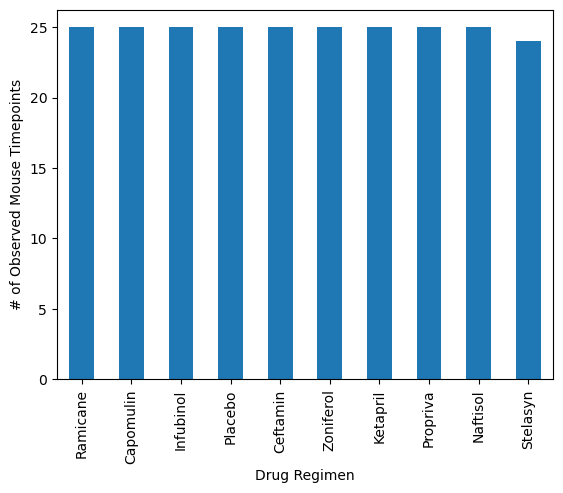

<Figure size 640x480 with 0 Axes>

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drop_duplicate_mice_chart = drop_duplicate_mice['Drug Regimen'].value_counts()
drop_duplicate_mice_chart.plot(kind='bar')

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.show()
plt.tight_layout()

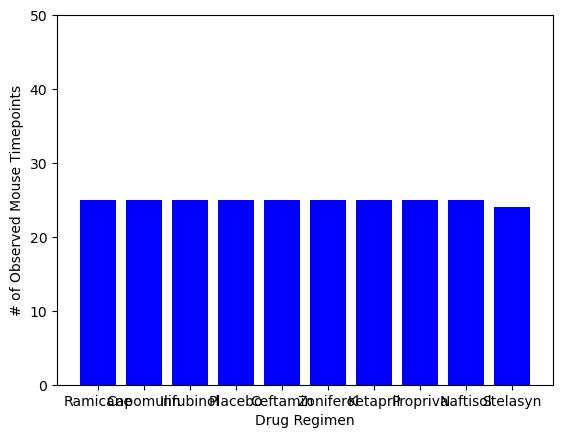

In [149]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drugs_chart = drop_duplicate_mice['Drug Regimen'].value_counts()

plt.bar(drugs_chart.index, drugs_chart, color='b', align="center")
        
plt.ylim(0, 50)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.show()

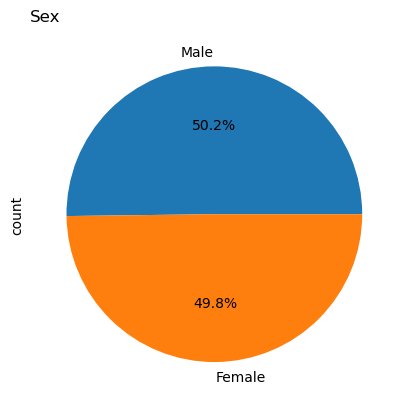

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
drop_duplicate_mice_chart = drop_duplicate_mice['Sex'].value_counts()
drop_duplicate_mice_chart.plot(kind='pie', autopct='%1.1f%%', labels=["Male", "Female"])
plt.title("Sex", loc="left")
plt.show()


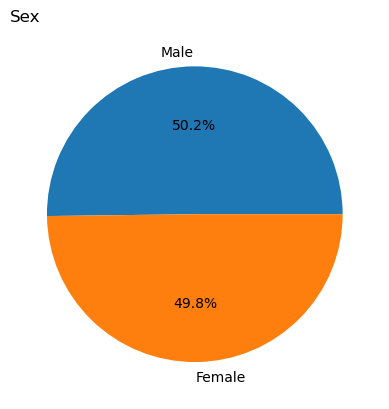

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
drop_duplicate_mice_chart = drop_duplicate_mice['Sex'].value_counts()

plt.pie(drop_duplicate_mice_chart, labels=["Male", "Female"], autopct='%1.1f%%')
plt.title("Sex", loc="left")
plt.show()

##**Quartiles, Outliers and Boxplots**

In [77]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  (ChatGPT, personal communication, January 23, 2024)
# Capomulin, Ramicane, Infubinol, and Ceftamin

drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_vol = drop_duplicate_mice[drop_duplicate_mice['Drug Regimen'].isin(drugs)]
final_volume = tumor_vol.groupby('Mouse ID')['Tumor Volume (mm3)'].last()

final_volume

# Start by getting the last (greatest) timepoint for each mouse (ChatGPT, personal communication, January 23, 2024)

current_timepoint = tumor_vol.groupby('Mouse ID')['Timepoint'].idxmax()
final_tumor_data = tumor_vol.loc[current_timepoint, ['Mouse ID', 'Tumor Volume (mm3)']]
final_tumor_data

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_data = pd.merge(drop_duplicate_mice, final_volume, on='Mouse ID', how='inner')
final_tumor_data.head(25)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3)_x,Metastatic Sites,Tumor Volume (mm3)_y
0,k403,Ramicane,Male,21,16,45,22.050126,1,22.050126
1,s185,Capomulin,Female,3,17,45,23.343598,1,23.343598
2,x401,Capomulin,Female,16,15,45,28.484033,0,28.484033
3,m601,Capomulin,Male,22,17,45,28.430964,1,28.430964
4,g791,Ramicane,Male,11,16,45,29.128472,1,29.128472
5,s508,Ramicane,Male,1,17,45,30.276232,0,30.276232
6,f966,Capomulin,Male,16,17,20,30.485985,0,30.485985
7,m546,Ramicane,Male,18,16,45,30.564625,1,30.564625
8,z578,Ramicane,Male,11,16,45,30.638696,0,30.638696
9,j913,Ramicane,Female,4,17,45,31.560470,1,31.560470


In [85]:
#final_tumor_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Mouse ID              100 non-null    object 
 1   Drug Regimen          100 non-null    object 
 2   Sex                   100 non-null    object 
 3   Age_months            100 non-null    int64  
 4   Weight (g)            100 non-null    int64  
 5   Timepoint             100 non-null    int64  
 6   Tumor Volume (mm3)_x  100 non-null    float64
 7   Metastatic Sites      100 non-null    int64  
 8   Tumor Volume (mm3)_y  100 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 7.2+ KB


In [98]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data =[]


#Locate the rows which contain mice on each drug and get the tumor volumes (ChatGPT, personal communication, January 23, 2024.

for treatment in treatments:
    treatment_data = final_tumor_data[final_tumor_data["Drug Regimen"] == treatment].reset_index(drop=True)
    tumor_volumes = treatment_data["Tumor Volume (mm3)_x"]
    tumor_volume_data.append(tumor_volumes)
    #print(tumor_volume_data)

# Calculate the IQR and quantitatively determine if there are any potential outliers. (samples_solution in class exercise)

quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
lower_quartile = quartiles[0.25]
upper_quartile = quartiles[0.75]
iqr = upper_quartile - lower_quartile
    
    # Determine outliers using upper and lower bounds. (samples_solution in class exercise)
outliers_dict = {}

lower_bound = lower_quartile - 1.5 * iqr
upper_bound = upper_quartile + 1.5 * iqr

maybe_outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
outliers_dict[treatment] = maybe_outliers

# Display the dictionary with potential outliers + print out upper/lower bound outliers
print(f"{treatments}'s potential outliers {maybe_outliers}")

print(f"The lower quartile is: {lower_quartile}")
print(f"The upper quartile is: {upper_quartile}")
print(f"The iqr is: {iqr}")
print(f"Values below {lower_bound} could be outliers")
print(f"Values above {upper_bound} could be outliers")

['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']'s potential outliers Series([], Name: Tumor Volume (mm3)_x, dtype: float64)
The lower quartile is: 48.72207785
The upper quartile is: 64.29983003
The iqr is: 15.577752179999997
Values below 25.355449580000002 could be outliers
Values above 87.66645829999999 could be outliers


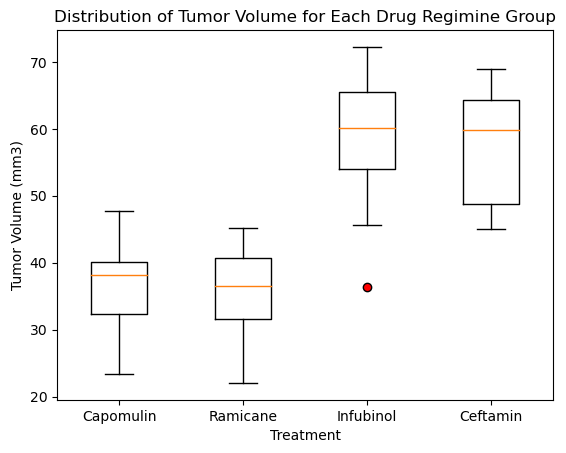

In [109]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Create a list of tumor volumes for each treatment (ChatGPT, personal communication, January 23, 2023).
tumor_volume_lists = [treatment_data_dict[treatment]['All Data'] for treatment in treatments]

# Generate a box plot.Boxplot Demo from 
#https://matplotlib.org/3.3.3/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py
plt.boxplot(tumor_volume_lists, labels=treatments, flierprops=dict(markerfacecolor='r', marker='o'))

plt.title('Tumor Volume Distribution for Drug Regimine')
plt.xlabel('Treatment')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


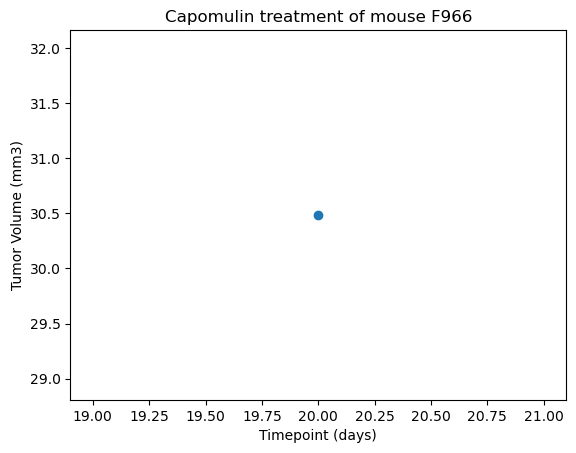

In [130]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
drug_treatment = "Capomulin"
mouse = final_tumor_data[(final_tumor_data['Drug Regimen'] == drug_treatment) & (final_tumor_data['Mouse ID'] == 'f966')]

# Create a line plot
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)_x'], marker='o')

# Show the plot

plt.title("Capomulin treatment of mouse F966")
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

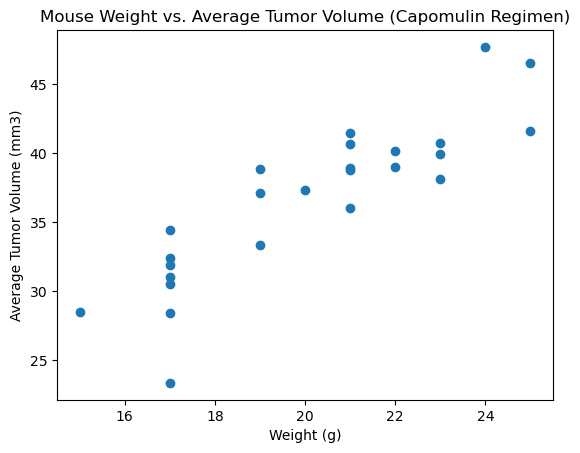

In [144]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen. 
#Code sourced (ChatGPT, personal communication, January 23, 2024)

# Choose the Capomulin regimen (ChatGPT, personal communication, January 23, 2024)
capomulin_data = final_tumor_data[final_tumor_data['Drug Regimen'] == 'Capomulin']

# Calculate the average observed tumor volume for each mouse. (ChatGPT, personal communication, January 23, 2024)
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)_y'].mean().reset_index()

# Merge the average tumor volume data with the weight data. (ChatGPT, personal communication, January 23, 2024)
merged_data = pd.merge(capomulin_data[['Mouse ID', 'Weight (g)']].drop_duplicates(), average_tumor_volume, on='Mouse ID')

# Create a scatter plot. (ChatGPT, personal communication, January 23, 2024)
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)_y'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')

# Show the plot
plt.show()


##**Correlation and Regression**

Correlation Coefficient: 0.8767060403658116


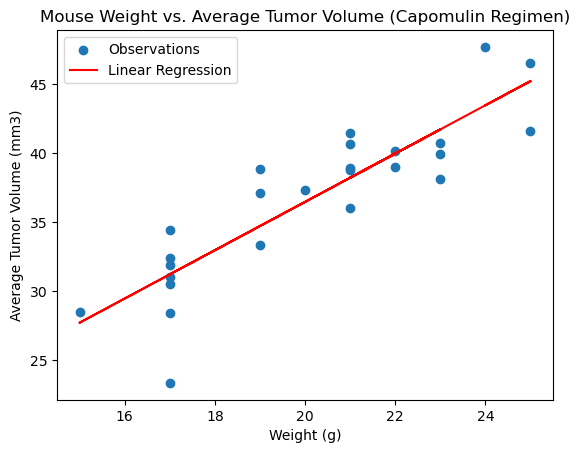

In [147]:
from sklearn.linear_model import LinearRegression

# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
#Code sourced (ChatGPT, personal communication, January 23, 2024)

# Choose the Capomulin regimen. (ChatGPT, personal communication, January 23, 2024)
capomulin_data = final_tumor_data[final_tumor_data['Drug Regimen'] == 'Capomulin']

# Calculate the average observed tumor volume for each mouse. (ChatGPT, personal communication, January 23, 2024)
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)_y'].mean().reset_index()

# Merge the average tumor volume data with the weight data. (ChatGPT, personal communication, January 23, 2024)
merged_data = pd.merge(capomulin_data[['Mouse ID', 'Weight (g)']].drop_duplicates(), average_tumor_volume, on='Mouse ID')

# Calculate the correlation coefficient. (ChatGPT, personal communication, January 23, 2024)
correlation_coefficient, _ = st.pearsonr(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)_y'])
print(f"Correlation Coefficient: {correlation_coefficient}")

# Perform linear regression (ChatGPT, personal communication, January 23, 2024)
X = merged_data[['Weight (g)']]
y = merged_data['Tumor Volume (mm3)_y']

# Create and fit the linear regression model. (ChatGPT, personal communication, January 23, 2024)
model = LinearRegression()
model.fit(X, y)

# Predict tumor volume using the linear regression model. (ChatGPT, personal communication, January 23, 2024)
predictions = model.predict(X)

# Plot the linear regression line. (ChatGPT, personal communication, January 23, 2024)
plt.scatter(X, y, label='Observations')
plt.plot(X, predictions, color='red', label='Linear Regression')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.legend()
plt.show()
